# Lab | Customer Analysis Round 6

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

## Get the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

We are using the marketing_customer_analysis.csv file.

In [2]:
df = pd.read_csv('marketing_customer_analysis.csv')
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


## Dealing with the data

In [3]:
# change the header to lower case and replace the space to '_'
df.columns = [column.lower().replace(' ', '_') for column in df.columns]

In [4]:
df = df.drop(['customer'], axis=1)

Already done in the round 2.

In [5]:
df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
cat = df.select_dtypes('object')
cat

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
#check if standardizing is needed
for column in cat.columns:
    print(column, cat[column].unique())

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['C

In [8]:
df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])
df["effective_to_date"].dt.day
df["effective_day"] = df["effective_to_date"].dt.day
df["effective_to_date"].dt.month
df["effective_month"] = df["effective_to_date"].dt.month

df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_day,effective_month
0,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,2
1,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,1
2,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,2
3,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,1
4,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,10,2
9130,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,12,2
9131,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6,2
9132,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,3,2


In [9]:
df = df.drop(['effective_to_date'], axis=1)

In [10]:
df.isna().sum()

state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
effective_day                    0
effective_month                  0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   employmentstatus               9134 non-null   object 
 6   gender                         9134 non-null   object 
 7   income                         9134 non-null   int64  
 8   location_code                  9134 non-null   object 
 9   marital_status                 9134 non-null   object 
 10  monthly_premium_auto           9134 non-null   int64  
 11  months_since_last_claim        9134 non-null   int64  
 12  months_since_policy_inception  9134 non-null   i

## Explore the data

Done in the round 3.

In [12]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_day,effective_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,15.461134,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,8.653770,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,8.000000,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,15.000000,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,23.000000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,31.000000,2.000000


In [13]:
df.select_dtypes(np.number)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_day,effective_month
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2
1,6979.535903,0,94,13,42,0,8,1131.464935,31,1
2,12887.431650,48767,108,18,38,0,2,566.472247,19,2
3,7645.861827,0,106,18,65,0,7,529.881344,20,1
4,2813.692575,43836,73,12,44,0,1,138.130879,3,2
...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10,2
9130,3096.511217,21604,79,14,28,0,1,379.200000,12,2
9131,8163.890428,0,85,9,37,3,2,790.784983,6,2
9132,7524.442436,21941,96,34,3,0,3,691.200000,3,2


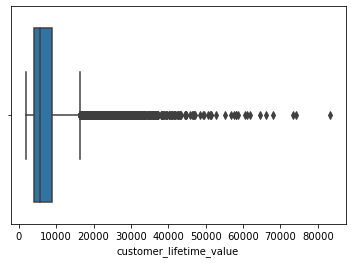

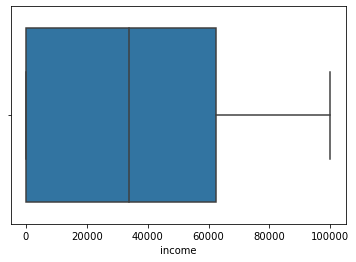

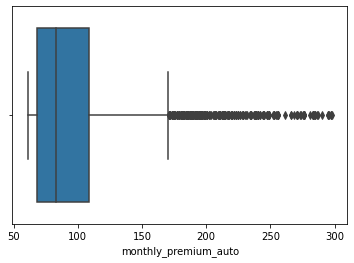

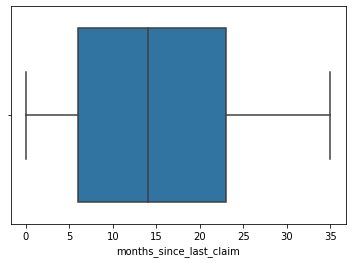

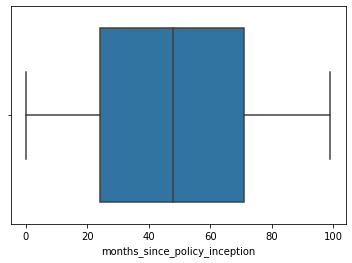

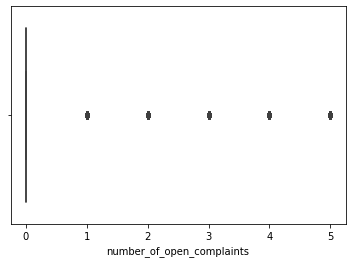

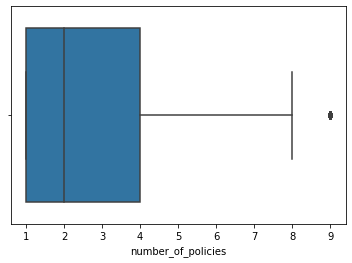

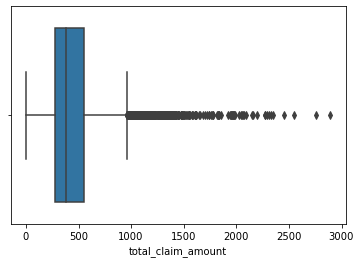

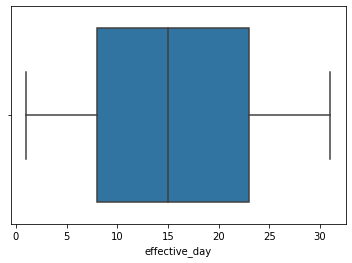

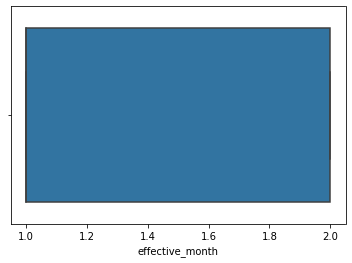

In [14]:
for column in df.select_dtypes(np.number).columns:
    sns.boxplot(df[column])
    plt.show()

In [15]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci


In [16]:
df, _ci = boxcox_transform(df)
df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_day,effective_month
0,Washington,2.703839,No,Basic,Bachelor,Employed,F,1247.937066,Suburban,Married,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize,12.332553,0.561741
1,Arizona,2.754926,No,Extended,Bachelor,Unemployed,F,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize,15.113469,0.000000
2,Nevada,2.780772,No,Premium,Bachelor,Employed,F,1144.063081,Suburban,Married,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize,10.205416,0.561741
3,California,2.759125,No,Basic,Bachelor,Unemployed,M,1167.961720,Suburban,Married,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize,10.642249,0.000000
4,Washington,2.704995,No,Basic,Bachelor,Employed,M,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize,1.675664,0.561741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.801170,No,Basic,Bachelor,Employed,M,1448.531450,Urban,Married,0.685461,7.347815,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize,5.910154,0.561741
9130,California,2.711030,Yes,Extended,College,Employed,F,697.790558,Suburban,Divorced,0.685606,6.134207,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize,6.935502,0.561741
9131,California,2.762062,No,Extended,Bachelor,Unemployed,M,1167.961720,Suburban,Single,0.685725,4.379465,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize,3.661620,0.561741
9132,California,2.758397,No,Extended,College,Employed,M,704.383672,Suburban,Married,0.685898,11.319628,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large,1.675664,0.561741


In [17]:
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [18]:
#Create a df copy 'df1'
df1 = df.copy()

df1 = remove_outliers(df1, threshold=1.5, in_columns = ['customer_lifetime_value', 'monthly_premium_auto', 'number_of_policies'])
df1

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_day,effective_month
0,Washington,2.703839,No,Basic,Bachelor,Employed,F,1247.937066,Suburban,Married,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Agent,33.035752,Two-Door Car,Medsize,12.332553,0.561741
1,Arizona,2.754926,No,Extended,Bachelor,Unemployed,F,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Personal L3,Offer3,Agent,56.357614,Four-Door Car,Medsize,15.113469,0.000000
2,Nevada,2.780772,No,Premium,Bachelor,Employed,F,1144.063081,Suburban,Married,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Personal L3,Offer1,Agent,40.071789,Two-Door Car,Medsize,10.205416,0.561741
3,California,2.759125,No,Basic,Bachelor,Unemployed,M,1167.961720,Suburban,Married,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Corporate L2,Offer1,Call Center,38.763252,SUV,Medsize,10.642249,0.000000
4,Washington,2.704995,No,Basic,Bachelor,Employed,M,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Personal L1,Offer1,Agent,19.560154,Four-Door Car,Medsize,1.675664,0.561741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,2.801170,No,Basic,Bachelor,Employed,M,1448.531450,Urban,Married,0.685461,7.347815,33.090025,0.648045,0.607328,Personal Auto,Personal L1,Offer2,Web,23.588905,Four-Door Car,Medsize,5.910154,0.561741
9130,California,2.711030,Yes,Extended,College,Employed,F,697.790558,Suburban,Divorced,0.685606,6.134207,13.709541,0.648045,0.000000,Corporate Auto,Corporate L3,Offer1,Branch,32.792951,Four-Door Car,Medsize,6.935502,0.561741
9131,California,2.762062,No,Extended,Bachelor,Unemployed,M,1167.961720,Suburban,Single,0.685725,4.379465,17.034934,1.176115,0.607328,Corporate Auto,Corporate L2,Offer1,Branch,47.263726,Four-Door Car,Medsize,3.661620,0.561741
9132,California,2.758397,No,Extended,College,Employed,M,704.383672,Suburban,Married,0.685898,11.319628,1.667871,0.648045,0.893486,Personal Auto,Personal L2,Offer3,Branch,44.225147,Four-Door Car,Large,1.675664,0.561741


In [19]:
df1.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_day,effective_month
customer_lifetime_value,1.000000,0.014783,0.462918,0.011244,-0.000376,-0.034522,0.496025,0.207833,-0.005032,-0.006828
income,0.014783,1.000000,-0.002803,-0.029517,0.012317,0.017231,0.002334,-0.184405,-0.015413,-0.013532
monthly_premium_auto,0.462918,-0.002803,1.000000,-0.003920,0.016696,-0.007148,-0.010645,0.488579,0.000270,0.014316
months_since_last_claim,0.011244,-0.029517,-0.003920,1.000000,-0.043670,0.001609,0.010656,-0.002146,0.024933,-0.016685
months_since_policy_inception,-0.000376,0.012317,0.016696,-0.043670,1.000000,0.017925,-0.006658,0.001922,-0.015060,0.014275
number_of_open_complaints,-0.034522,0.017231,-0.007148,0.001609,0.017925,1.000000,-0.000875,0.014354,0.018147,-0.002315
number_of_policies,0.496025,0.002334,-0.010645,0.010656,-0.006658,-0.000875,1.000000,-0.007070,0.001021,0.003149
total_claim_amount,0.207833,-0.184405,0.488579,-0.002146,0.001922,0.014354,-0.007070,1.000000,-0.002111,0.004099
effective_day,-0.005032,-0.015413,0.000270,0.024933,-0.015060,0.018147,0.001021,-0.002111,1.000000,-0.092627
effective_month,-0.006828,-0.013532,0.014316,-0.016685,0.014275,-0.002315,0.003149,0.004099,-0.092627,1.000000


## Processing Data

(Further processing...)

- X-y split. (done)
- Normalize (numerical). (done)
- One Hot/Label Encoding (categorical).
- Concat DataFrames

**X-Y Split** If you have not done it, you have you take in count that the target will be `total_claim_amount`

In [20]:
#drop total clam amount

#X_num = X.select_dtypes(include = np.number)
#X_cat = X.select_dtypes(include = np.object)

In [21]:
#X = df1.drop('total_claim_amount', axis=1)
#y = df1['total_claim_amount']

#X = sm.add_constant(X)

#model = sm.OLS(y,X).fit()

#print(model.summary())

In [22]:
#OLS Summary
#p_value check 0.05 remove the high
#try to improve the Rsquare
#normalized



**Normalize (numerical)** If you have not done it yet, you can define a function using `StandardScaler`from sklearn library

In [23]:
#After splitting the training set and training test

#transformer = StandardScaler()
#transformer.fit(X_num)

#x_standardized = transformer.transform(X_num)
#x_standardized 

In [24]:
#df1_1 = pd.DataFrame(x_standardized)
#df1_1

In [25]:
#df1 = df1_1.rename(columns = {0:'customer_lifetime_value', 1 : 'income', 2:'monthly_premium_auto', 3 : 'months_since_last_claim', 4:'months_since_policy_inception', 5:'number_of_open_complaints', 6 : 'number_of_policies'})
#df1

**One Hot/Label Encoding (categorical)** Try one of the two options learned in class

In [26]:
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [27]:
#X_cat

In [28]:
df = pd.get_dummies(df1, drop_first=True)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_day,effective_month,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752,12.332553,0.561741,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614,15.113469,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789,10.205416,0.561741,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252,10.642249,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154,1.675664,0.561741,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.801170,1448.531450,0.685461,7.347815,33.090025,0.648045,0.607328,23.588905,5.910154,0.561741,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
9130,2.711030,697.790558,0.685606,6.134207,13.709541,0.648045,0.000000,32.792951,6.935502,0.561741,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9131,2.762062,1167.961720,0.685725,4.379465,17.034934,1.176115,0.607328,47.263726,3.661620,0.561741,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9132,2.758397,704.383672,0.685898,11.319628,1.667871,0.648045,0.893486,44.225147,1.675664,0.561741,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


**Concat DataFrames**

In [29]:

#done above

## Linear Regression

- Train-test split.
- Apply linear regression.

In [30]:
# Are there any easier way to drop multiple columns easier than copy&pasting?

y = df['total_claim_amount']
X = df.drop(['total_claim_amount','months_since_policy_inception','number_of_policies', 'effective_day', 'effective_month',
            'state_California', 'state_Nevada','employmentstatus_Employed','employmentstatus_Retired','policy_type_Personal Auto','policy_Personal L3',
             'policy_Special L3','sales_channel_Call Center','sales_channel_Web','vehicle_class_Two-Door Car', 'vehicle_size_Medsize','policy_Special L2'], axis=1)

In [31]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [32]:
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        10:16:38   Log-Likelihood:                -27371.
No. Observations:                9126   AIC:                         5.482e+04
Df Residuals:                    9089   BIC:                         5.508e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [33]:
# what we can remove: p_value which is bigger than 0.05
# removing the ove 0.6
#months_since_policy_inception
#number_of _policies
#effective_day
#effective_month
#state_California
#state_Nevada
#employmentstatus_Employed
#employmentstatus_Retired
#policy_type_Personal Auto
#policy_Personal L3
#policy_Special L3
#sales_channel_Call Center
#sales_channel_Web
#vehicle_class_Two-Door Car
#vehicle_size_Medsize



**Train-test split** Divide your data in a train part and a test part

In [34]:
#Splitting the dataset into Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [35]:
# using standard scaler
transformer = StandardScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)
x_standardized#.shape
pd.DataFrame(x_standardized)





,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,-1.396400,0.351298,-0.849979,1.483843,0.112083,-0.630855,3.234938,-0.409031,-0.654517,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,-0.979822,0.762287,-0.457933,0.850978,-0.608160,-0.20787,-0.264094,2.829997,-0.395981,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,-0.624749,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
1,0.274751,0.085731,0.435899,-0.113435,0.112083,-0.630855,-0.309125,-0.409031,1.527844,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,1.716253,-0.979822,0.762287,-0.457933,-1.175118,1.644303,-0.20787,-0.264094,-0.353357,-0.395981,-0.550427,-0.085351,-0.686803,2.318913,-0.355512,-0.624749,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
2,1.120225,0.006372,0.849806,0.371808,0.112083,-0.630855,-0.309125,-0.409031,-0.654517,3.176271,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,-0.979822,0.762287,-0.457933,0.850978,-0.608160,-0.20787,-0.264094,-0.353357,-0.395981,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,-0.624749,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
3,0.412088,0.085731,0.798832,0.371808,0.112083,-0.630855,-0.309125,-0.409031,-0.654517,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,1.716253,1.020593,0.762287,-0.457933,0.850978,-0.608160,-0.20787,3.786531,-0.353357,-0.395981,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,-0.624749,-0.13316,-0.142249,2.020221,-0.236397,-0.489155
4,-1.358583,-0.231674,-0.570535,-0.219636,0.112083,-0.630855,3.234938,-0.409031,-0.654517,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,1.020593,-1.311842,-0.457933,-1.175118,1.644303,-0.20787,-0.264094,-0.353357,2.525376,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,-0.624749,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,1.787457,1.017394,-0.570535,0.371808,0.112083,-0.630855,-0.309125,-0.409031,-0.654517,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,1.020593,-1.311842,2.183723,0.850978,-0.608160,-0.20787,-0.264094,-0.353357,2.525376,-0.550427,-0.085351,1.456022,-0.431236,-0.355512,-0.624749,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
9122,-1.161195,-1.475527,-0.215504,-0.010699,0.112083,-0.630855,-0.309125,2.444804,1.527844,-0.314835,1.551288,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,-0.979822,0.762287,-0.457933,-1.175118,-0.608160,-0.20787,-0.264094,2.829997,-0.395981,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,1.600644,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
9123,0.508185,0.085731,0.078994,-0.563760,2.044599,-0.630855,-0.309125,-0.409031,1.527844,-0.314835,-0.644626,-0.197318,-0.634421,-0.297274,-0.222911,1.716253,1.020593,0.762287,-0.457933,-1.175118,1.644303,-0.20787,3.786531,-0.353357,-0.395981,-0.550427,-0.085351,-0.686803,-0.431236,-0.355512,1.600644,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155
9124,0.388290,-1.453634,0.504170,1.623648,0.112083,-0.630855,-0.309125,-0.409031,1.527844,-0.314835,1.551288,-0.197318,-0.634421,-0.297274,-0.222911,-0.582665,1.020593,0.762287,-0.457933,0.850978,-0.608160,-0.20787,-0.264094,-0.353357,-0.395981,1.816772,-0.085351,-0.686803,2.318913,-0.355512,1.600644,-0.13316,-0.142249,-0.494995,-0.236397,-0.489155


**Apply linear regression** For this question you can use `statsmodels` or `sklearn` libraries

In [36]:
# Fitting Simple Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model Validation

- Description:
R2.
MSE.
RMSE.
MAE.

In [37]:
# predicting the test set results
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
prediction = model.predict(X_test)

In [40]:
#I tried below to show a plot with the LR but didn't work 

#plt.scatter(X_train, y_train, color = 'red')
#plt.plot(X_train, model.predict(X_train), color = 'blue')
#plt.title('total_claim_amount(Training set)')
#plt.xlabel('x')
#plt.ylabel('total_claim_amount')
#plt.show()

**Get R2 from the model**

In [41]:
r2_score(y_test, prediction)

0.8211666902641236

**Get MSE from the model**

In [42]:
mean_absolute_error(y_test, prediction)

3.709069524814291

**Get RMSE from the model**

In [43]:
mean_squared_error(y_test, prediction, squared = False)

5.02862657495233

**Get MAE from the model**

In [44]:
#revert the Target 'total_claim_amount' back from boxcox value
from scipy.special import inv_boxcox

prediction_2 = inv_boxcox(prediction, _ci['total_claim_amount'])

In [45]:
mean_absolute_error(y_test, prediction_2)

396.00309111361594

In [46]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['total_claim_amount'])
results['pred'] = prediction
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
437,125.194389,15.541242,109.653147
1229,295.223164,30.875367,264.347797
3319,67.801384,16.111321,51.690063
4078,864.000000,58.875893,805.124107
3093,425.800112,32.439373,393.360739
...,...,...,...
6438,345.600000,31.576222,314.023778
2664,393.637436,30.812198,362.825238
856,842.391832,46.859887,795.531945
5237,535.080276,39.710930,495.369346


In [47]:
results.describe()

,true,pred,resid
count,2738.000000,2738.000000,2738.000000
mean,439.522468,33.137948,406.646216
std,296.927638,10.692880,287.573960
min,0.382107,9.398477,0.107601
25%,279.248721,27.419755,251.585296
50%,387.685323,34.546153,352.851509
75%,555.703512,40.172819,514.129518
max,2893.239678,64.382051,2836.810039
